In [3]:
import numpy as np 
import pandas as pd
import matplotlib as plt

In [4]:
df = pd.read_csv(r"C:\Users\Pranav\Documents\Python Scripts\IMDB Dataset.csv")


In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.shape

(50000, 2)

In [45]:
df1= df['review']
df1
df['totalwords'] = df['review'].str.split().str.len()



In [46]:
print("Categories:", df.sentiment.unique())
print("Number of unique words:", len(np.unique(np.hstack(df1))))

length = [len(i) for i in df1]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

length = [i for i in df['totalwords']]
print("Average Review length of positve reviews:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: ['positive' 'negative']
Number of unique words: 49582
Average Review length: 1309.43102
Standard Deviation: 990.0
Average Review length of positve reviews: 231.15694
Standard Deviation: 171.0


Text(0.5, 1.0, 'categories')

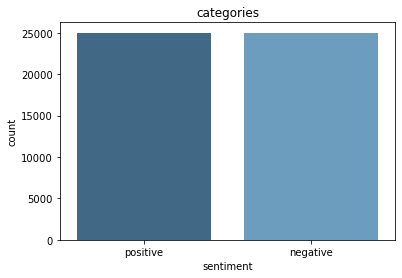

In [33]:
import seaborn as sns

ax = sns.countplot(x="sentiment", data=df, palette="Blues_d")
ax.set_title('categories')

In [48]:
df_pos= df[df['sentiment'] == 'positive']
df_neg= df[df['sentiment'] == 'negative']
df_pos.head()

,review,sentiment,totalwords
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119


In [49]:
length = [i for i in df_pos['totalwords']]
print("Average Review length of positve reviews:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length of positve reviews: 232.84932
Standard Deviation: 177.0


In [50]:
length = [i for i in df_neg['totalwords']]
print("Average Review length of positve reviews:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length of positve reviews: 229.46456
Standard Deviation: 165.0


In [51]:
from collections import Counter
Counter(" ".join(df["review"]).split()).most_common(100)

[('the', 568735),
 ('a', 306960),
 ('and', 301919),
 ('of', 283625),
 ('to', 261850),
 ('is', 203056),
 ('in', 169981),
 ('I', 132498),
 ('that', 126818),
 ('this', 113726),
 ('it', 107916),
 ('/><br', 100974),
 ('was', 92658),
 ('as', 83130),
 ('with', 82569),
 ('for', 80919),
 ('The', 67317),
 ('but', 66282),
 ('on', 61197),
 ('movie', 60762),
 ('are', 56513),
 ('film', 54277),
 ('his', 54198),
 ('have', 54009),
 ('not', 52140),
 ('you', 50697),
 ('be', 50539),
 ('at', 42421),
 ('by', 42290),
 ('he', 42114),
 ('one', 41334),
 ('an', 41076),
 ('from', 37876),
 ('who', 37207),
 ('like', 36028),
 ('all', 35272),
 ('they', 35201),
 ('has', 32420),
 ('so', 32386),
 ('just', 32338),
 ('or', 32221),
 ('about', 32036),
 ('her', 29944),
 ('out', 28679),
 ('some', 28052),
 ('very', 25794),
 ('more', 25412),
 ('This', 24329),
 ('would', 23578),
 ('what', 23320),
 ('when', 22749),
 ('good', 22582),
 ('if', 22009),
 ('their', 21975),
 ('only', 21694),
 ('It', 21475),
 ('really', 21322),
 ('had', 

In [59]:
import spacy
sp = spacy.load('en_core_web_sm')

stop_words = sp.Defaults.stop_words
stop_words |= {'I',"my_new_stopword2",'/><br',
 'The', 'movie',
 'film', 'This',
 'It',
 "it's",'-','/>The',
 '<br',
 'But',
 'it.',
 'way','And','watch', 'know', 'seen'} 



def remove_stopwords(text):#remove_stopwords function gives stopwordfree sentences
    words=[word for word in text.split() if word not in stop_words]
    return words
df["review_new"]=df['review'].apply(lambda x: ' '.join(remove_stopwords(x)))    
df.head()   

,review,sentiment,totalwords,review_new
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production. filming techniq...
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful spend time hot summer weeken...
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love Time Money"" visually stu..."


In [60]:
from collections import Counter
Counter(" ".join(df["review_new"]).split()).most_common(100)

[('like', 36028),
 ('good', 22582),
 ('story', 16443),
 ('time', 15312),
 ('people', 14414),
 ('great', 14385),
 ("don't", 13954),
 ('think', 13083),
 ('bad', 12847),
 ('little', 11206),
 ('movie.', 10659),
 ('characters', 10448),
 ('character', 10307),
 ("It's", 10224),
 ('movies', 10118),
 ('love', 10033),
 ('best', 9899),
 ('A', 9655),
 ('In', 9482),
 ('films', 9406),
 ('plot', 9305),
 ('acting', 9182),
 ('He', 8894),
 ('film.', 8878),
 ('better', 8866),
 ('If', 8687),
 ("doesn't", 8529),
 ("didn't", 8281),
 ('scene', 8183),
 ('makes', 8144),
 ('film,', 8097),
 ('find', 7952),
 ('movie,', 7948),
 ('There', 7889),
 ("I'm", 7878),
 ('watching', 7757),
 ('real', 7716),
 ('scenes', 7713),
 ('actually', 7618),
 ('going', 7559),
 ('/>I', 7347),
 ('life', 7231),
 ('lot', 7229),
 ('look', 7111),
 ('&', 7063),
 ('thing', 6954),
 ('want', 6953),
 ('end', 6762),
 ('pretty', 6718),
 ("can't", 6699),
 ('man', 6670),
 ('old', 6640),
 ('got', 6630),
 ('actors', 6528),
 ('years', 6340),
 ('thought'

In [61]:


def remove_stopwords(text):#remove_stopwords function gives stopwordfree sentences
    words=[word for word in text.split() if word not in stop_words]
    return words
df_pos["review_new"]=df['review'].apply(lambda x: ' '.join(remove_stopwords(x)))    
df_neg["review_new"]=df['review'].apply(lambda x: ' '.join(remove_stopwords(x))) 

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [63]:
df_neg.head()

,review,sentiment,totalwords,review_new
3,Basically there's a family where a little boy ...,negative,138,Basically there's family little boy (Jake) thi...
7,"This show was an amazing, fresh & innovative i...",negative,174,"amazing, fresh & innovative idea 70's aired. 7..."
8,Encouraged by the positive comments about this...,negative,130,Encouraged positive comments looking forward w...
10,Phil the Alien is one of those quirky films wh...,negative,96,Phil Alien quirky films humour based oddness a...
11,I saw this movie when I was about 12 when it c...,negative,180,saw 12 came out. recall scariest scene big bir...


In [64]:
from collections import Counter
Counter(" ".join(df_pos["review_new"]).split()).most_common(100)

[('like', 15665),
 ('good', 11318),
 ('great', 10331),
 ('story', 9331),
 ('time', 7712),
 ('people', 6819),
 ('best', 6752),
 ('love', 6705),
 ('think', 6527),
 ('little', 5795),
 ("don't", 5665),
 ("It's", 5231),
 ('films', 5226),
 ('A', 5215),
 ('He', 5122),
 ('character', 5101),
 ('characters', 5057),
 ('In', 5030),
 ('movies', 4683),
 ('makes', 4624),
 ('movie.', 4588),
 ('life', 4588),
 ('film.', 4548),
 ('film,', 4450),
 ('find', 4311),
 ('real', 4122),
 ('man', 3938),
 ('scene', 3882),
 ('lot', 3868),
 ('years', 3849),
 ('If', 3780),
 ('young', 3771),
 ('better', 3731),
 ("doesn't", 3619),
 ('scenes', 3578),
 ('acting', 3551),
 ('movie,', 3482),
 ('plot', 3474),
 ('/>I', 3427),
 ('There', 3424),
 ('old', 3323),
 ('going', 3271),
 ('saw', 3257),
 ('end', 3243),
 ("didn't", 3203),
 ('look', 3177),
 ("I'm", 3152),
 ('watching', 3121),
 ('bit', 3047),
 ('actually', 3040),
 ('work', 3034),
 ('new', 3029),
 ('cast', 3026),
 ('want', 2986),
 ('got', 2956),
 ('things', 2952),
 ('actors

In [65]:
from collections import Counter
Counter(" ".join(df_neg["review_new"]).split()).most_common(100)

[('like', 20363),
 ('good', 11264),
 ('bad', 10103),
 ("don't", 8289),
 ('time', 7600),
 ('people', 7595),
 ('story', 7112),
 ('think', 6556),
 ('movie.', 6071),
 ('plot', 5831),
 ('acting', 5631),
 ('movies', 5435),
 ('little', 5411),
 ('characters', 5391),
 ('character', 5206),
 ('better', 5135),
 ("didn't", 5078),
 ("It's", 4993),
 ("doesn't", 4910),
 ('If', 4907),
 ("I'm", 4726),
 ('watching', 4636),
 ('actually', 4578),
 ('thing', 4516),
 ('movie,', 4466),
 ('There', 4465),
 ('In', 4452),
 ('A', 4440),
 ('film.', 4330),
 ('scene', 4301),
 ('going', 4288),
 ('films', 4180),
 ('worst', 4135),
 ('scenes', 4135),
 ('&', 4123),
 ('great', 4054),
 ("can't", 3971),
 ('want', 3967),
 ('look', 3934),
 ('pretty', 3933),
 ('/>I', 3920),
 ('He', 3772),
 ('got', 3674),
 ('film,', 3647),
 ('find', 3641),
 ('real', 3594),
 ('actors', 3586),
 ('makes', 3520),
 ('end', 3519),
 ("isn't", 3421),
 ('lot', 3361),
 ('love', 3328),
 ('old', 3317),
 ('thought', 3272),
 ('gets', 3217),
 ("I've", 3166),
 (

Review length: 


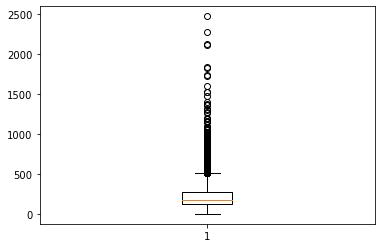

In [69]:
import matplotlib.pyplot as plt 
# Summarize review length
print("Review length: ")
# plot review length
plt.boxplot(df['totalwords'])
plt.show()

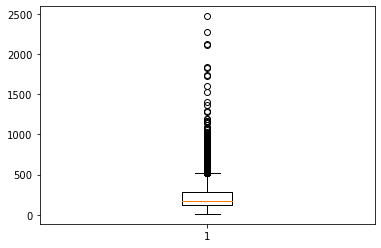

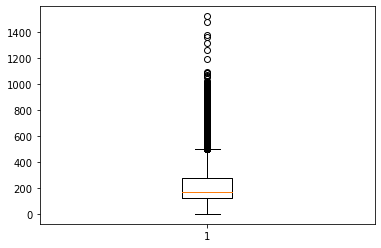

In [70]:
plt.boxplot(df_pos['totalwords'])
plt.show()
plt.boxplot(df_neg['totalwords'])
plt.show()

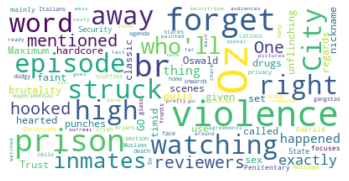

In [72]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text= df.review_new[0]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()